First, let's embed a ring in 3D.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np
from scipy import integrate
import torch

sys.path.append(os.path.join(os.getenv("HOME"), "RNN_Manifold/"))
import decode_1d, generate_1d, geometry_util

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using device {}".format(device))

using device cuda


In [4]:
encoder, decoder, _ = generate_1d.train(1, 0, 3, device, n_training_iterations=3000)

/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 1.53909432888031, distance cost: 0.020777085795998573
iteration: 1, decoding loss: 0.818290650844574, distance cost: 0.007772920187562704
iteration: 2, decoding loss: 0.548988401889801, distance cost: 0.01433581579476595
iteration: 4, decoding loss: 0.5274782776832581, distance cost: 0.02510092593729496
iteration: 5, decoding loss: 0.4580356776714325, distance cost: 0.024429166689515114
iteration: 6, decoding loss: 0.3427305221557617, distance cost: 0.01902458630502224
iteration: 7, decoding loss: 0.2207796424627304, distance cost: 0.013974564149975777
iteration: 8, decoding loss: 0.18889805674552917, distance cost: 0.014169275760650635
iteration: 382, decoding loss: 0.178477942943573, distance cost: 0.02437676303088665
iteration: 384, decoding loss: 0.1768181174993515, distance cost: 0.025822512805461884
iteration: 386, decoding loss: 0.17330701649188995, distance cost: 0.02404422126710415
iteration: 394, decoding loss: 0.1745137870311737, distance cost: 0

In [7]:
angles = np.arange(start=0, stop=2 * np.pi, step=0.01)
with torch.no_grad():
    test_embedding = encoder(torch.tensor(np.expand_dims(angles, -1), dtype=torch.get_default_dtype()).to(device))
test_embedding = test_embedding.cpu().numpy()

The shape it generates should be pretty much random, as there is nothing in the loss function we use that encourages a specific shape

In [8]:
%matplotlib tk
proj_fig = plt.figure()
proj_axs = proj_fig.add_subplot(projection="3d")
proj_axs.scatter(test_embedding[:, 0], test_embedding[:, 1], test_embedding[:, 2], cmap="hsv", c=angles)


Now let's generate a higher dimensional ring

In [10]:
encoder, decoder, _ = generate_1d.train(1, 0, 24, device, n_training_iterations=3000)

/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 1.489019751548767, distance cost: 0.00112432474270463
iteration: 2, decoding loss: 1.3833147287368774, distance cost: 0.09350144118070602
iteration: 3, decoding loss: 0.838883638381958, distance cost: 0.15744730830192566
iteration: 4, decoding loss: 0.7576688528060913, distance cost: 0.16355252265930176
iteration: 14, decoding loss: 0.7381740212440491, distance cost: 0.18060605227947235
iteration: 18, decoding loss: 0.7165833115577698, distance cost: 0.169908806681633
iteration: 19, decoding loss: 0.6743557453155518, distance cost: 0.1631624549627304
iteration: 20, decoding loss: 0.642243504524231, distance cost: 0.1731463074684143
iteration: 21, decoding loss: 0.6313309073448181, distance cost: 0.15856808423995972
iteration: 22, decoding loss: 0.5848531723022461, distance cost: 0.11777205765247345
iteration: 23, decoding loss: 0.5595338344573975, distance cost: 0.11306687444448471
iteration: 24, decoding loss: 0.535430908203125, distance cost: 0.1164331212

In [11]:
angles = np.arange(start=0, stop=2 * np.pi, step=0.01)
with torch.no_grad():
    high_d_generated_ring_data = encoder(torch.tensor(np.expand_dims(angles, -1), dtype=torch.get_default_dtype()).to(device))
high_d_generated_ring_data = high_d_generated_ring_data.cpu().numpy()

And then decode it

In [12]:
high_d_generated_ring_data = high_d_generated_ring_data/np.mean(np.abs(high_d_generated_ring_data))

In [14]:
encoder, decoder, _ = decode_1d.train(data=high_d_generated_ring_data, n_circular_dimensions=1, n_linear_dimensions=0, device=device,
                                                   n_training_iterations=3000, decoder_weight=10, order_red_weight=0.1)


/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 1.4003078937530518, distance cost: 0.0012490141671150923, order reduction: 0.07457074522972107
iteration: 2, decoding loss: 0.6519466638565063, distance cost: 0.7746526598930359, order reduction: 0.1312858611345291
iteration: 5, decoding loss: 0.38960322737693787, distance cost: 0.05581944063305855, order reduction: 0.188451886177063
iteration: 6, decoding loss: 0.26946431398391724, distance cost: 0.08049338310956955, order reduction: 0.0034690871834754944
iteration: 8, decoding loss: 0.226283460855484, distance cost: 0.0449918732047081, order reduction: 0.039573654532432556
iteration: 9, decoding loss: 0.08070217072963715, distance cost: 0.08428743481636047, order reduction: 0.04123597592115402
iteration: 13, decoding loss: 0.0787663608789444, distance cost: 0.07723010331392288, order reduction: 0.0023098248057067394
iteration: 14, decoding loss: 0.07183147966861725, distance cost: 0.08072684705257416, order reduction: 0.06472364813089371
iteration: 17, de

In [16]:
with torch.no_grad():
    decoded_angles = decoder(torch.tensor(high_d_generated_ring_data, dtype=torch.get_default_dtype()).to(device))

predicted_phases = torch.squeeze(decoded_angles).cpu().numpy()

In [17]:
def compare_to_ground_truth(predicted_phases, ground_truth_phases, plot_ax):
    refd_test_phases = geometry_util.reference_periodic_phases(predicted_phases)
    refd_true_phases = geometry_util.reference_periodic_phases(ground_truth_phases)
    line = np.arange(start=-np.pi, stop=np.pi, step=0.01)
    plot_ax.scatter(refd_true_phases, refd_test_phases)
    plot_ax.plot(line, line, color="black", linestyle="--", label="y=x")
    plot_ax.set_xlabel("True Phase")
    plot_ax.set_ylabel("Found Phase")
    return refd_test_phases, refd_true_phases


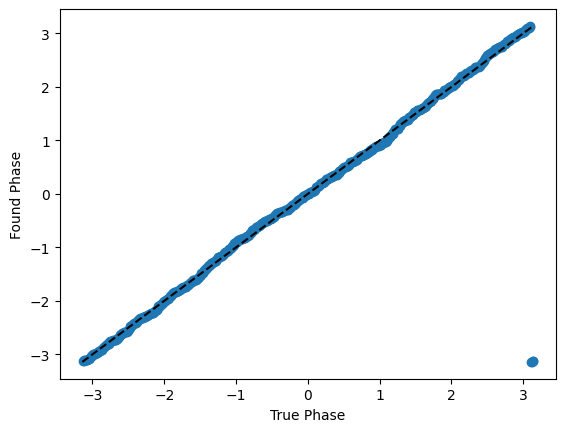

In [18]:
%matplotlib inline
fig, ax = plt.subplots()
refd_predicted_phases, refd_true_phases = compare_to_ground_truth(predicted_phases, angles, ax)


Now let's do a harder problem. Let's decode noisy data generated by a dynamic system. First, the dynamics. We will use a typical ring attractor model,

In [19]:
def conv_circ(signal, ker):
    return np.fft.ifft(np.einsum("ij, j -> ij", np.fft.fft(signal, axis=1), np.fft.fft(ker)), axis=1)


def cosine_kernel(w_0, w_1, N):
    step = 2/(N)
    grid = np.arange(start=0, stop=2, step=step) * np.pi
    weights = -w_0 + w_1 * np.cos(grid)
    return weights


def ring_attractor_dynamics(state, kernel, bias_vec, nonlin_fn):
    if len(np.shape(state)) == 1:
        state = np.expand_dims(state, -1)
    state = np.transpose(state)
    return np.transpose(-state + nonlin_fn(conv_circ(state, kernel) + bias_vec))


def sigmoid(x):
    return np.exp(x)/(np.exp(x) + 1)

Generate some samples of equalibrium states. We will generate around 50, to make things interesting.

In [20]:
N = 2 ** 7
n_samples = 50

init_conds = np.random.uniform(-1, 1, (n_samples, N)).astype(np.complex)

w_0 = 1
w_1 = 1
kernel = cosine_kernel(w_0, w_1, N)


def run_equilibriation(init_conds):
    soln = integrate.solve_ivp(lambda _, y: ring_attractor_dynamics(y, kernel, np.zeros(N), sigmoid),
                               [0, 20], init_conds, vectorized=True)
    return soln.y[:, -1]


p = mp.Pool()
solns = np.array(p.map(run_equilibriation, init_conds))
p.close()
p.join()

/tmp/ipykernel_299117/1478060612.py:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  init_conds = np.random.uniform(-1, 1, (n_samples, N)).astype(np.complex)


Add some noise

In [21]:
ring_attractor_data = np.real(solns/np.mean(np.abs(solns)))
noisy_ring_attractor_data = ring_attractor_data + np.random.normal(0, np.max(ring_attractor_data)/15, np.shape(ring_attractor_data))

Note down the ground truth phases

In [22]:
true_ring_att_phases = (np.argmax(ring_attractor_data, axis=1)/N) * 2 * np.pi

Text(0, 0.5, 'Datapoint')

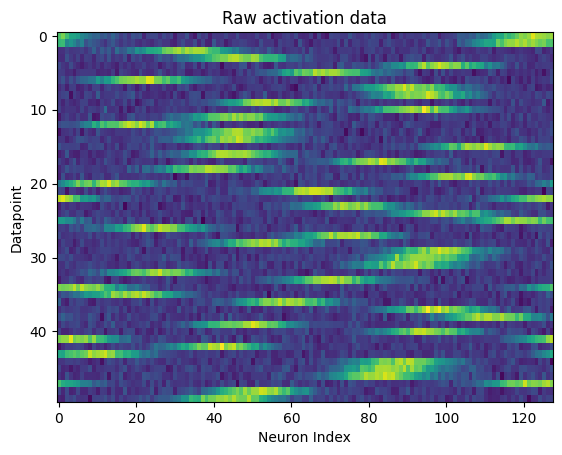

In [23]:
fig, ax = plt.subplots()
ax.imshow(noisy_ring_attractor_data, aspect="auto")
ax.set_title("Raw activation data")
ax.set_xlabel("Neuron Index")
ax.set_ylabel("Datapoint")


Now decode

In [34]:
encoder, decoder, _ = decode_1d.train(data=noisy_ring_attractor_data, n_circular_dimensions=1, n_linear_dimensions=0, device=device,
                                                   n_training_iterations=3000, decoder_weight=5, order_red_weight=1)


iteration: 0, decoding loss: 4.244379997253418, distance cost: 0.004394881427288055, order reduction: 0.0010826467769220471
iteration: 1, decoding loss: 3.5669138431549072, distance cost: 0.03701339289546013, order reduction: 0.0006176629103720188
iteration: 2, decoding loss: 2.9395997524261475, distance cost: 0.03282640874385834, order reduction: 0.0014449910959228873
iteration: 3, decoding loss: 2.5661935806274414, distance cost: 0.08209507912397385, order reduction: 0.0025807018391788006
iteration: 4, decoding loss: 2.203385591506958, distance cost: 0.1457960158586502, order reduction: 0.00249435193836689
iteration: 5, decoding loss: 2.098032236099243, distance cost: 0.13787634670734406, order reduction: 0.0025398836005479097
iteration: 6, decoding loss: 1.8499938249588013, distance cost: 0.0608794130384922, order reduction: 0.002463046694174409
iteration: 7, decoding loss: 1.665208339691162, distance cost: 0.010696018114686012, order reduction: 0.0024317377246916294
iteration: 8, d

In [35]:
with torch.no_grad():
    decoded_angles = decoder(torch.tensor(noisy_ring_attractor_data, dtype=torch.get_default_dtype()).to(device))

ring_att_predicted_phases = torch.squeeze(decoded_angles).cpu().numpy()

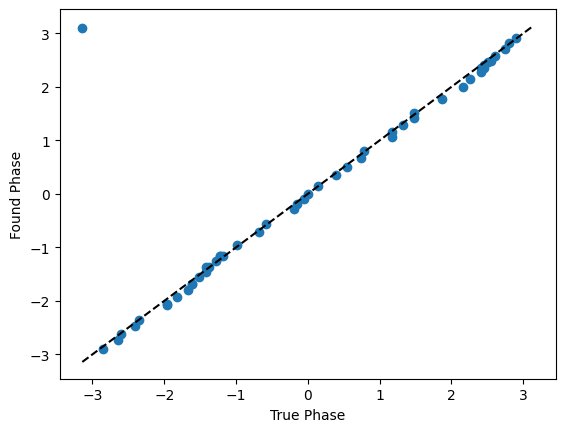

In [36]:
%matplotlib inline
fig, ax = plt.subplots()
refd_ring_att_predicted_phases, refd_ring_att_true_phases = compare_to_ground_truth(ring_att_predicted_phases, true_ring_att_phases, ax)
